In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('axes', unicode_minus=False)
from IPython.display import set_matplotlib_formats

import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

set_matplotlib_formats('retina')

C:\Users\wlsgh\AppData\Local\Temp/ipykernel_12944/2092777599.py:14: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
df=pd.read_csv('../data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv', low_memory=False)
df.shape

(91335, 39)

In [3]:
df.describe(include='object')

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,법정동명,대지구분명,지번주소,도로명,건물관리번호,건물명,도로명주소,동정보,층정보,호정보
count,91335,1346,91335,91335,91335,91335,91335,91335,86413,86413,...,91280,91335,91335,91335,91335,46453,91335,7406,44044,15551
unique,56910,858,1,1,5,5,34,34,15,15,...,2822,2,53118,16610,54142,17946,54031,556,74,849
top,리원,장례식장,S,의료,S01,병원,S02A01,약국,Q86201,일반 의원,...,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,현대아파트,서울특별시 동대문구 약령중앙로8길 10,1,1,1
freq,152,97,91335,91335,60774,60774,18964,18964,22555,22555,...,874,91213,198,326,198,131,198,1571,15994,1286


In [4]:
df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [5]:
df['상권업종대분류명'].nunique()

1

In [6]:
df['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [7]:
df['상권업종중분류명'].nunique()

5

In [8]:
df['상권업종소분류명']

0           산부인과
1          내과/외과
2           신경외과
3           기타병원
4             약국
          ...   
91330         약국
91331      산후조리원
91332    노인/치매병원
91333        한의원
91334       안과의원
Name: 상권업종소분류명, Length: 91335, dtype: object

In [9]:
df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91330,16196725,온누리약국,베스트,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,3017011200115070000021096,NaN,대전광역시 서구 문예로 67,302831.0,35240.0,NaN,NaN,NaN,127.389865,36.352728
91331,16192180,리원,봄산후조,S,의료,S07,의료관련서비스업,S07A07,산후조리원,S96993,...,4128112300111460000011715,청한프라자,경기도 고양시 덕양구 성신로 14,412827.0,10503.0,NaN,NaN,NaN,126.830144,37.627530
91332,16127538,참좋은요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2641010800105380001005572,한신시티빌,부산광역시 금정구 금강로 209,609841.0,46294.0,NaN,2,NaN,129.082790,35.227138
91333,16108681,경희중앙한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,1174010500103450009002392,NaN,서울특별시 강동구 천중로 213,134811.0,5303.0,NaN,NaN,NaN,127.143958,37.540993


In [10]:
df['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [11]:
df['상권업종소분류명'].nunique()

34

In [12]:
# nunique 대신 len 을 사용할 수도 있다.
len(df["상권업종소분류명"].unique())

34

1.11.4 그룹화된 요약값 보기 - value_coutns
    * value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.

In [13]:
city=df['시도명'].value_counts()

In [14]:
# nomalize_True 옵션을 사용하면 비율을 구할 수 있다.
city_normalize=df["시도명"].value_counts(normalize=True)
city_normalize

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

<AxesSubplot:>

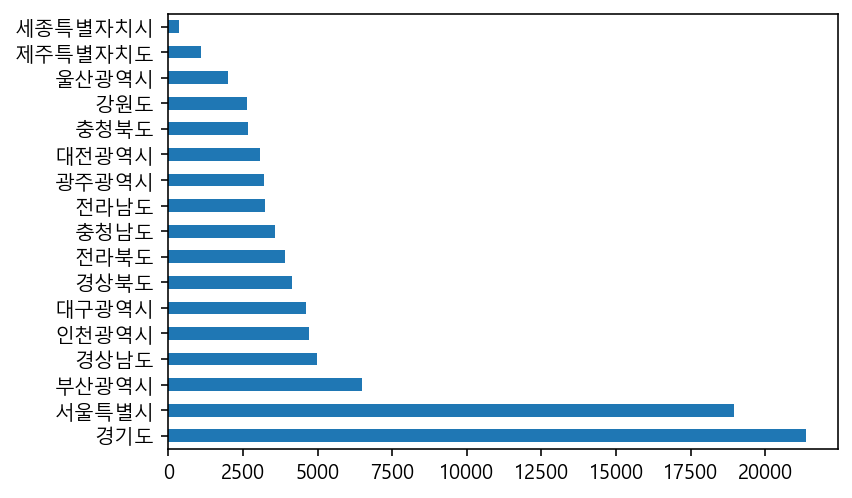

In [15]:
# pandas 에는 plot 기능을 내장하고 있습니다.
# 위에서 분석한 시도명 수를 막대그래프로 표현해 봅니다.
city.plot.barh()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1666: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='시도명'>

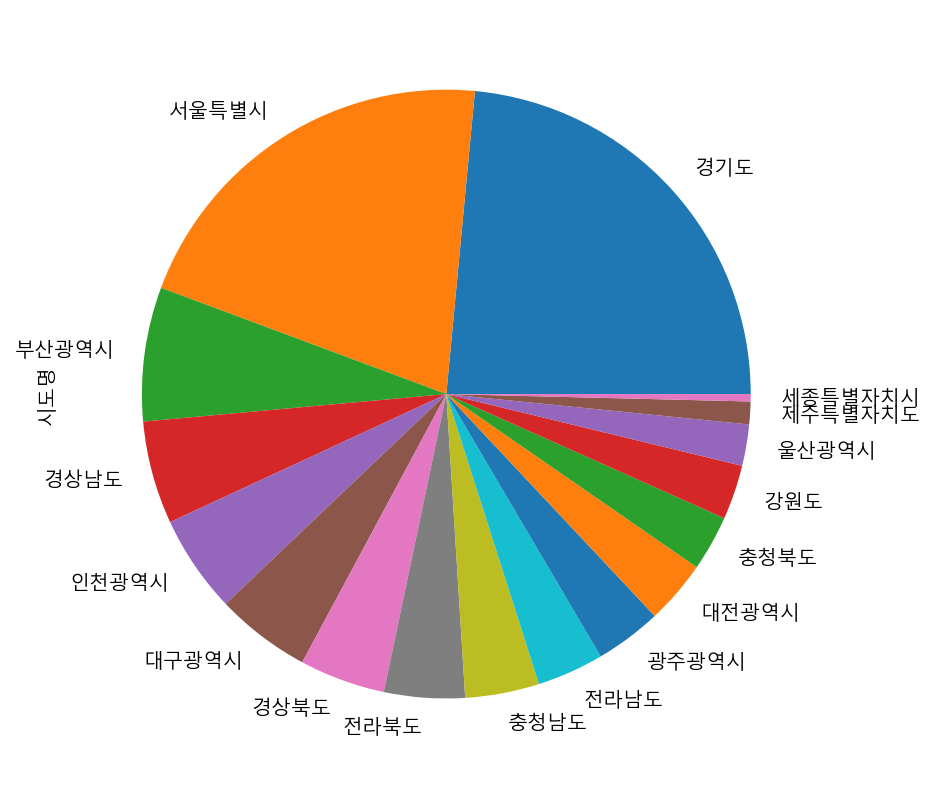

In [16]:
# pandas의 plot.pie()를 사용해서 파이 그래프를 그려봅니다.
city_normalize.plot.pie(figsize=(7,7))

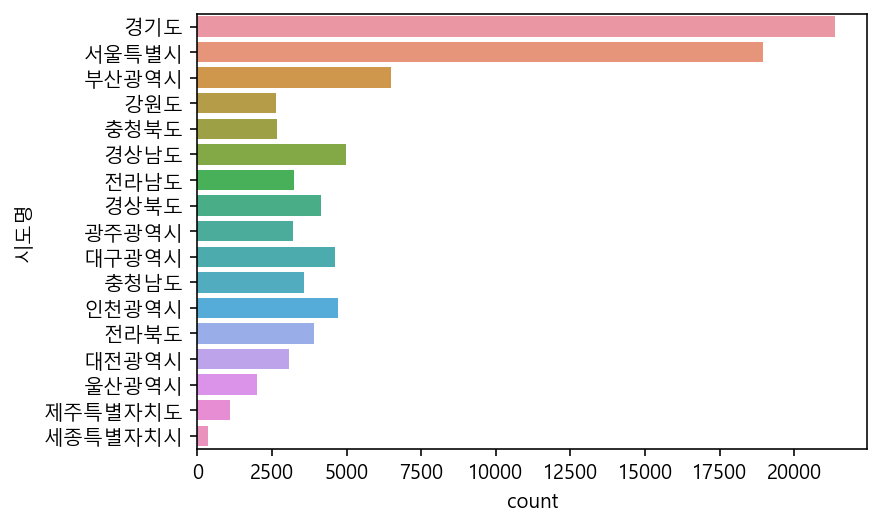

In [17]:
# seaborn 의 countplot 으로 그려 봅니다.
c=sns.countplot(data=df,y='시도명')

In [18]:
# 상권업종대분류명 으로 갯수 세어봅시다
df['상권업종대분류명'].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [19]:
# 중분류명
c=df['상권업종중분류명'].value_counts()

In [20]:
# normalize=True 는 비율 구하기
n=df['상권업종중분류명'].value_counts(normalize=True)

<AxesSubplot:>

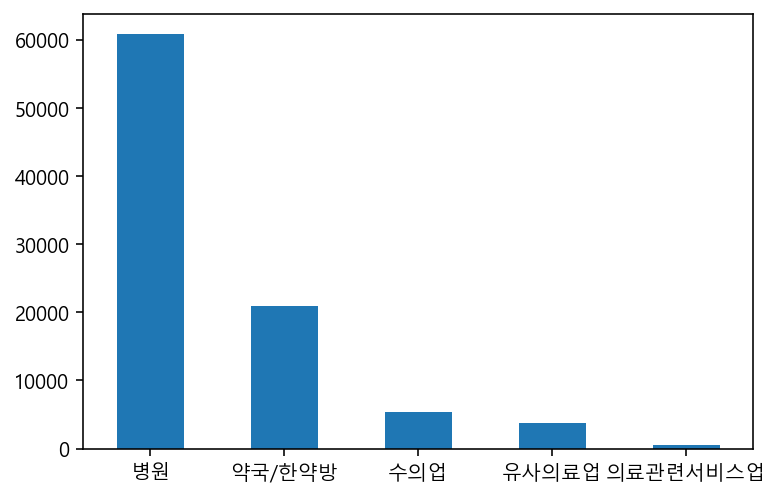

In [21]:
# 판다스의 plot.bar() 막대그래프 쓰기  rot=0 레이블값을 얼마나 회전시킬지
c.plot.bar(rot=0)

<AxesSubplot:ylabel='상권업종중분류명'>

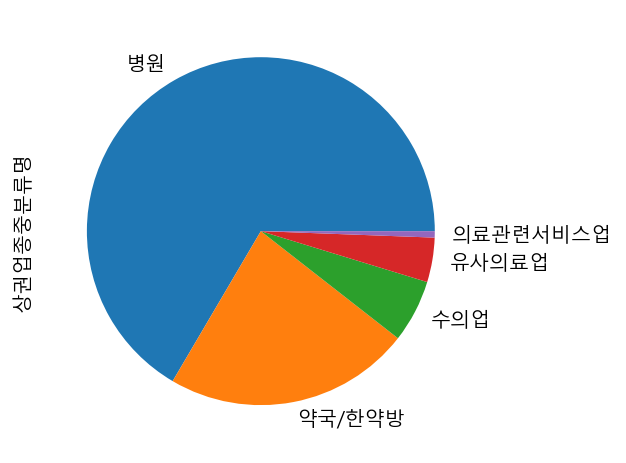

In [22]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.
n.plot.pie()

In [23]:
# 상권업종소분류명 에 대한 그룹화 된 값을 카운트 합니다.
c=df['상권업종소분류명'].value_counts()

<AxesSubplot:>

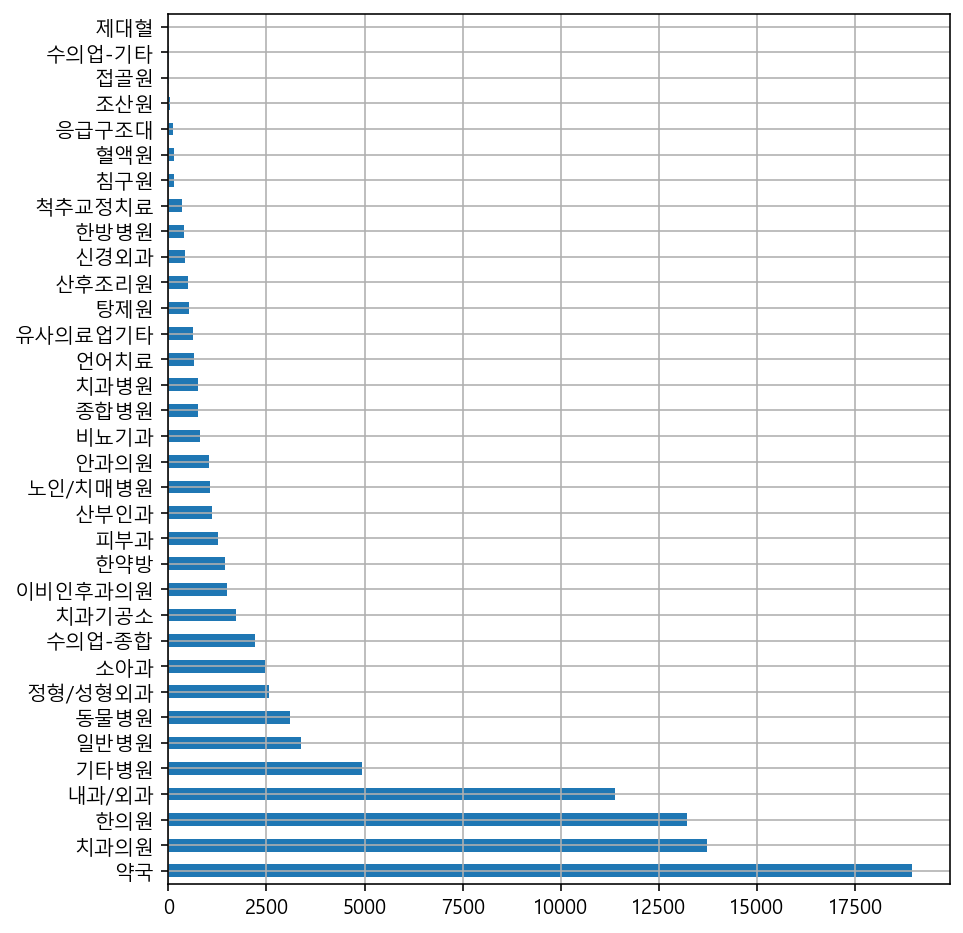

In [24]:
# 상권업종소분류명으로 bar를 사용해서 막대그래프를 그려봅니다. grid는 격자를 생성해준다.
c.plot.barh(figsize=(7,8), grid=True)

1.12 데이터 색인하기
    * 특정 데이터만 모아서 따로 봅니다.

In [25]:
# '상권업종중분류명'이 약국/한약방 인 데이터만 가져와서
# df_medical 이라는 변수에 담아봅니다.
# 그리고 head()를 통해 미리보기를 합니다.
# copy를 사용하게되면 df_medical(새로운 변수) 를 바꿔도 원래 변수는 바뀌지 않는다. copy를 사용하지 않으면 둘 다 바뀐다.
df_medical=df[df["상권업종중분류명"] == "약국/한약방"].copy()
df_medical.head(2)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528
6,20733252,춘산한약방,NaN,S,의료,S02,약국/한약방,S02A02,한약방,G47811,...,4211010500101000000023668,NaN,강원도 춘천시 낙원길 50,200042.0,24273.0,NaN,2,NaN,127.726905,37.880504


In [26]:
# "상권업종대분류명" 에서 "의료"만 가져옵니다.
# df.loc를 사용하면 행, 열을 함께 가져올 수 있습니다.
# 이 기능을 통해 "상권업종중분류명" 만 가져옵니다.
# 그리고 가져온 결과를 value_counts 를 통해 중분류의 갯수를 세어봅니다.
m=df['상권업종대분류명']== '의료'
df.loc[m,'상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [27]:
# 유사의료업만 따로 모아봅니다.
df_medi=df[df['상권업종중분류명']=='유사의료업']
df_medi.shape

(3774, 39)

In [28]:
# 상호명을 그룹화해서 갯수를 세어봅니다.
# value_counts 를 사용해서 상위 10개를 출력합니다.
df['상호명'].value_counts().head(10)


리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

In [29]:
# 유사의료업만 df_medi 변수에 담겨져 있습니다.
# df_medi 변수에 상효명으로 갯수를 세어봅니다.
# 가장 많은 상호 상위 10개를 출력해 봅니다.
df_medi['상호명'].value_counts().head(10)

리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
미소치과기공소      8
아트치과기공소      8
이사랑치과기공소     8
Name: 상호명, dtype: int64

1.12.1 여러 조건으로 색인하기

In [30]:
1
2
3

3

In [31]:
# '상권업종소분류명'이 '약국'인 것과
# '시도명' 이 "서울특별시"인 데이터만 가져옵니다.
# 소괄호로 안묶어주면 연산자 우선순위 때문에 에러가난다.
df_seoul_drug=df[(df['상권업종소분류명']=="약국") & (df["시도명"]== "서울특별시")]
print(df_seoul_drug.shape)
df_seoul_drug.head()


(3579, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
33,20816709,이즈타워약,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1168010100108210001000001,이즈타워,서울특별시 강남구 테헤란로 101,135080.0,6134.0,NaN,1,NaN,127.028023,37.498656
51,20855710,진흥약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1174010600106090000000001,둔촌푸르지오아파트,서울특별시 강동구 명일로 172,134767.0,5360.0,NaN,NaN,NaN,127.145055,37.534135
130,21589838,신세계약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1126010600106460000000300,금강리빙스텔,서울특별시 중랑구 신내로 211,131130.0,2024.0,NaN,1,NaN,127.092597,37.616424
136,22388303,메디팜한솔약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1120010700103460012016935,한진노변상가,서울특별시 성동구 행당로 82,133777.0,4717.0,NaN,1,NaN,127.027513,37.556238
141,22412563,명약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1123010900102860121007257,NaN,서울특별시 동대문구 망우로18나길 3,130090.0,2498.0,NaN,1,NaN,127.060556,37.587349


1.12.2 구별로 보기

In [36]:
# 위에서 색인한 데이터로 "시군구명"으로 그룹화해서 갯수를 세어봅니다.
# 구별로 약국이 몇개가 있는지 확인해 봅니다,
c= df_seoul_drug["시군구명"].value_counts()
c.head()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: 시군구명, dtype: int64

In [41]:
# normalize=True 를 통해 비율을 구해봅시다.
n=df_seoul_drug["시군구명"].value_counts(normalize=True)
n.head()

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
Name: 시군구명, dtype: float64

<AxesSubplot:>

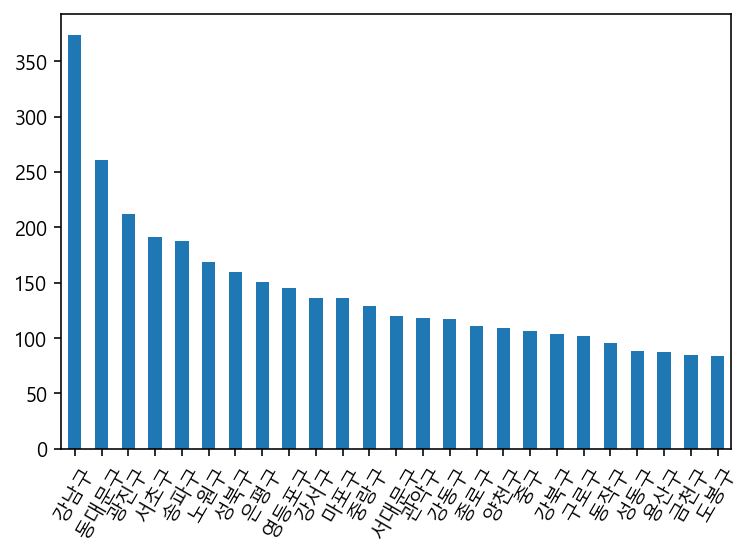

In [46]:
# 위에서 구한 결과를 판다스의 plot.bar()를 활용해 막대그래프로 그립니다.
c.plot.bar(rot=60)

In [51]:
# "상권업종소분류명"이 "종합병원" 인 것과
# "시도명" 이 "서울특별시" 인 데이터만 가져옵니다.
# 결과를 df_seoul_hospital 에 할당해서 재사용합니다.
df_seoul_hospital=df[(df["상권업종소분류명"] == "종합병원") & (df["시도명"]== "서울특별시")].copy()
df_seoul_hospital


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
305,25155642,대진의료재단,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1121510100100580025000733,재단법인대순진리회,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,NaN,NaN,NaN,127.088279,37.559048
353,20471487,홍익병원별관,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1147010100108970013001044,홍익병원별관,서울특별시 양천구 국회대로 250,158070.0,7937.0,NaN,1,NaN,126.862805,37.529213
385,20737057,SNUH,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1168010100107360055027688,성보빌딩,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,NaN,4,NaN,127.035825,37.499630
1917,23210677,평화드림여의도성모병원의료기매장,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1156011000100620000031477,여의도성모병원,서울특별시 영등포구 63로 10,150713.0,7345.0,NaN,1,NaN,126.936693,37.518296
2461,20024045,한양,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1120010700100150001019623,한대동문회관,서울특별시 성동구 마조로 22-2,133070.0,4763.0,NaN,4,NaN,127.041325,37.559469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71991,28505952,서울성모병원응급의료센터,응급의료센터,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1165010700101230000017226,가톨릭대학교성의교정,서울특별시 서초구 반포대로 222,137701.0,6591.0,NaN,1,NaN,127.005841,37.502382
76508,12292992,라마르의원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1174010900104530021010314,원방빌딩,서울특별시 강동구 천호대로157길 18,134864.0,5335.0,NaN,NaN,NaN,127.127466,37.538485
90492,16031909,가톨릭대학교여의도성모병원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1114012700100010001019574,명동성당,서울특별시 중구 명동길 74,100809.0,4537.0,NaN,NaN,NaN,126.986758,37.563662
90581,16332576,씨엠병원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1156010500100900000035097,충무병원,서울특별시 영등포구 영등포로36길 13,150030.0,7301.0,NaN,NaN,NaN,126.903857,37.518807


In [52]:
# "시군구명"으로 그룹화 해서 구별로 종합병원의 수를 세어봅니다.
df_seoul_hospital["시군구명"].value_counts()

강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
강북구      4
도봉구      4
서대문구     4
양천구      4
성북구      3
강서구      2
중랑구      2
종로구      2
동대문구     2
구로구      2
노원구      2
금천구      2
성동구      2
관악구      2
동작구      1
마포구      1
용산구      1
은평구      1
Name: 시군구명, dtype: int64

1.12.3 텍스트 데이터 색인하기

In [62]:
# 색인하기 전에 상효명 중에 종합병원이 아닌 데이터를 찾아봅니다.
# ~를 사용하면 아닌것들만 가져올 수 있다.
df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"), "상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [67]:
# 상호명에서 특정 단어가 들어가는 데이터만 가져옵니다. - 꽃배달
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")]

Int64Index([1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177], dtype='int64')

In [75]:
# "꽃배달|의료기|장례식장|상담소|어린이집" 은 종합병원과 무관하기 때문에
# 전처리를 위해 해당 텍스트를 한 번에 검색합니다.
# 제거할 데이터의 인덱스만 drop_row에 담아주고 list 형태로 변환합니다.
drop_row=df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index
drop_row= drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [ ]:
# 의원으로 끝나는 데이터도 종합병원으로 볼 수 없기 때문에 인덱스를 찾아서
# drop_row2에 담아주고 list 형태로 변환합니다.
df_seoul_hospital["상호명"].str.endswith("의원")